## CROCUS WXT Temperature Data
### Download, Processing and Plotting
Downloads temperature data from **Vaisala WXT536** for CROCUS Nodes and visualizes it. Data downloading is slow due to high frequency of the WXT data.

In [59]:
import sage_data_client
import matplotlib.pyplot as plt
import pandas as pd

# from matplotlib.dates import DateFormatter

#### 1. Data
We retrieve data for the Nodes `W08D`, `W08E`, `W099`, `W0A4`, `W096` given time range and keep only temperature data (`wxt.env.temp`).


In [60]:
df = sage_data_client.query(start="2024-08-27T22:00:00Z",
                            end="2024-08-28T02:00:00Z",
                            filter={
                                "vsn": "W08D|W08E|W099|W0A4|W096",
                                "sensor": "vaisala-wxt536",
                                "name": "wxt.env.temp"
                            }
)
df = df[['timestamp', 'value', 'meta.vsn']]
df


,timestamp,value,meta.vsn
0,2024-08-27 22:00:00.001055038+00:00,31.6,W08D
1,2024-08-27 22:00:00.082002630+00:00,31.6,W08D
2,2024-08-27 22:00:00.163749602+00:00,31.6,W08D
3,2024-08-27 22:00:00.273095803+00:00,31.6,W08D
4,2024-08-27 22:00:00.367474392+00:00,31.6,W08D
...,...,...,...
692529,2024-08-28 01:59:59.646002617+00:00,22.3,W0A4
692530,2024-08-28 01:59:59.726033876+00:00,22.3,W0A4
692531,2024-08-28 01:59:59.806622166+00:00,22.3,W0A4
692532,2024-08-28 01:59:59.885946249+00:00,22.3,W0A4



#### 2. Select
Keep only three columns: `timestamp`, `value` (temperature), and `meta.vsn` for node.


In [62]:
print(df.dtypes)

if df['timestamp'].dtype != 'datetime64[ns]':
    df['timestamp'] = pd.to_datetime(df['timestamp'], errors='coerce')

# Drop missing timestamps
df.dropna(subset=['timestamp'], inplace=True)

# Location names
vsn_mapping = {
    'W0A4': 'ATMOS (W0A4)',
    'W099': 'NU (W099)',
    'W096': 'UIC (W096)',
    'W08E': 'CSU (W08E)',
    'W08D': 'NEIU (W08D)'
}

df['meta.vsn'] = df['meta.vsn'].map(vsn_mapping)

# Make 'timestamp' the index
df.set_index('timestamp', inplace=True)


timestamp    datetime64[ns, UTC]
value                    float64
meta.vsn                  object
dtype: object


#### 3. Plot
The `timestamp` is set as index then group by `vsn` and plot temperature for each node.


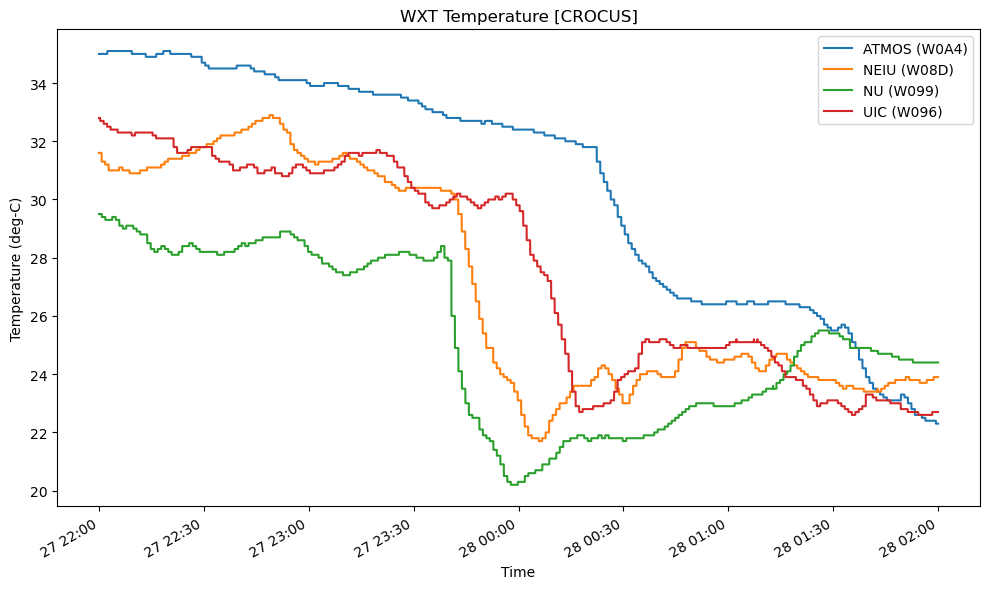

In [63]:
df.groupby('meta.vsn')['value'].plot(legend=True, figsize=(10, 6))

plt.xlabel('Time')
plt.ylabel('Temperature (deg-C)')
plt.title('WXT Temperature [CROCUS]')

plt.tight_layout()
plt.show()


#### 4. Save the `.csv`

In [64]:
filename = "/Users/bhupendra/projects/crocus/data/vsn_downloaded_data/test.csv"
df.to_csv(filename)